In [1]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('/content/drive/MyDrive/PTDL/kidney_disease.csv')

In [25]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [26]:
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
df.head(5)

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [28]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classes                      0
dtype: int64

In [29]:
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categoricals.head())
print(f"\n\t\tNumerical Columns")
display(numericals.head())

		Categorical Columns


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd



		Numerical Columns


,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [30]:
def converter(dataframe, column_name, new_name):
    dataframe[new_name] = dataframe[column_name].str.extract(r'(\d+)')  # Extract all numericals from the column and save it to a new column
    dataframe[new_name] = dataframe[new_name].astype(float)  # Turn the new column to a numerical datatype
    dataframe.drop(column_name, axis=1, inplace=True)  # Drop the column we don't need
    return dataframe  # Return the modified dataframe

converter(df, 'packed cell volume', 'packed_cell_volume')
converter(df, 'white blood cell count', 'white_blood_cell_count')
converter(df, 'red blood cell count', 'red_blood_cell_count')

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,yes,yes,no,good,no,no,ckd,44.0,7800.0,5.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,no,no,no,good,no,no,ckd,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,no,yes,no,poor,no,yes,ckd,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,ckd,35.0,7300.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,47.0,6700.0,4.0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,54.0,7800.0,6.0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,49.0,6600.0,5.0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,no,no,no,good,no,no,notckd,51.0,7200.0,5.0


In [31]:
for i in df.columns:
    if ((df[i].isnull().sum()/ len(df)) * 100) > 50:
        df.drop([i], axis = 1, inplace = True)
    elif df[i].dtypes == 'O':
        df[i].fillna(df[i].mode()[0], inplace = True)

    else:
        df[i].fillna(df[i].median(), inplace = True)

df.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classes                    0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
dtype: int64

In [32]:
df.drop('id', axis = 1, inplace = True)
df.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,yes,yes,no,good,no,no,ckd,44.0,7800.0,5.0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,no,no,no,good,no,no,ckd,38.0,6000.0,4.0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,no,yes,no,poor,no,yes,ckd,31.0,7500.0,4.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,yes,no,no,poor,yes,yes,ckd,32.0,6700.0,3.0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,no,no,no,good,no,no,ckd,35.0,7300.0,4.0


In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

for i in numericals.columns:
    if i in df.columns:
        df[i] = scaler.fit_transform(df[[i]])

for i in categoricals.columns:
    if i in df.columns:
        df[i] = encoder.fit_transform(df[i])

df.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,1,1,0,0,-0.320122,...,1,4,1,0,0,0,0,44.0,7800.0,5.0
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,1,1,0,0,-0.320122,...,0,3,1,0,0,0,0,38.0,6000.0,4.0
2,0.615355,0.254214,-1.421074,0.838742,2.507853,1,1,0,0,3.697618,...,0,4,1,1,0,1,0,31.0,7500.0,4.0
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,1,0,1,0,-0.373337,...,1,3,1,1,1,1,0,32.0,6700.0,3.0
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,1,1,0,0,-0.519679,...,0,3,1,0,0,0,0,35.0,7300.0,4.0


In [43]:
df['classes'].value_counts()

classes
0    248
2    150
1      2
Name: count, dtype: int64

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

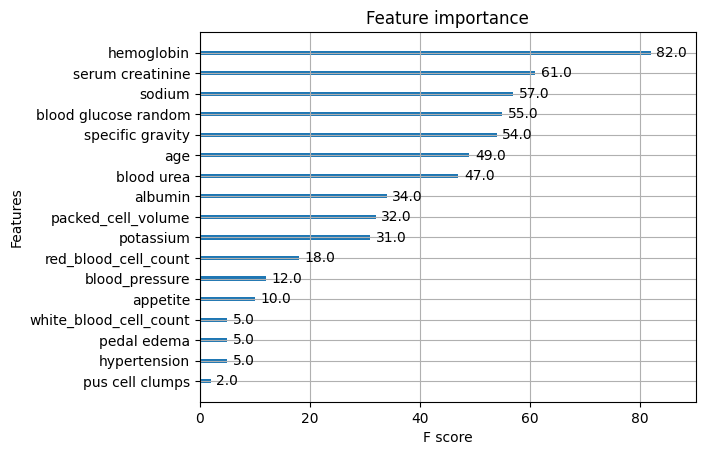

In [44]:
x = df.drop('classes', axis = 1)
y = df['classes']

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

xgb.plot_importance(model)

In [46]:
sel_cols = ['hemoglobin', 'serum creatinine', 'sodium', 'blood glucose random','specific gravity']
dx = df[sel_cols]
dx.head()

,hemoglobin,serum creatinine,sodium,blood glucose random,specific gravity
0,1.053226,-0.319668,0.040104,-0.320122,0.421486
1,-0.457965,-0.390819,0.040104,-0.320122,0.421486
2,-1.084556,-0.212942,0.040104,3.697618,-1.421074
3,-0.494823,0.142813,-2.896333,-0.373337,-2.342354
4,-0.347390,-0.284093,0.040104,-0.519679,-1.421074


In [47]:
x = dx
y = df.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 9, stratify = y)

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       120

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



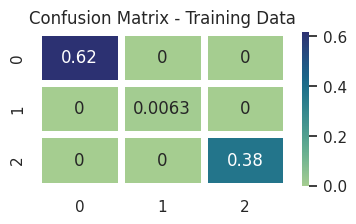


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           2       1.00      0.97      0.98        31

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



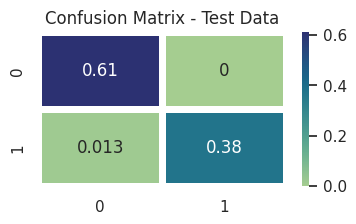

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(random_state=9)
rf_model.fit(xtrain, ytrain)

cross_validation = rf_model.predict(xtrain)

print("Classification Report on Training Data:")
print(classification_report(cross_validation, ytrain))

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize=(4, 2))
sns.set(style='darkgrid')
sns.heatmap(revealer / np.sum(revealer), annot=True, cmap='crest', linewidth=5)
plt.title('Confusion Matrix - Training Data')
plt.show()

test_predictions = rf_model.predict(xtest)

print("\nClassification Report on Test Data:")
print(classification_report(test_predictions, ytest))

test_confusion_matrix = confusion_matrix(test_predictions, ytest)
plt.figure(figsize=(4, 2))
sns.set(style='darkgrid')
sns.heatmap(test_confusion_matrix / np.sum(test_confusion_matrix), annot=True, cmap='crest', linewidth=5)
plt.title('Confusion Matrix - Test Data')
plt.show()